
#### 🎯 Business Problem & Objective

**📌 Real-world context:**
Lets assume The marketing team wants to understand customer behavior better so they can run **targeted promotions** — instead of “one-size-fits-all” campaigns.


#### ✅ Goal:

> "Use customer transaction data to create meaningful customer segments, and recommend marketing strategies for each segment."



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
# load the dataset
df = pd.read_excel('Online Retail.xlsx')

In [4]:
def data_summary(df):
    print("📌 Dataset Shape:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n📌 Column-wise Missing Values:")
    missing = df.isnull().sum()
    if missing.any():
        print(missing[missing > 0])
    else:
        print("✅ No missing values found.")
    
    print("\n📌 Duplicate Rows:")
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        print(f"⚠️ Found {duplicate_count} duplicate rows.")
    else:
        print("✅ No duplicate rows found.")
    
    print("\n📌 Basic Info:")
    print(df.info())

# Call it
data_summary(df)

📌 Dataset Shape:
Rows: 541909, Columns: 8

📌 Column-wise Missing Values:
Description      1454
CustomerID     135080
dtype: int64

📌 Duplicate Rows:
⚠️ Found 5268 duplicate rows.

📌 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
# display five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



### ✅ **1. How many rows and columns are there?**

* **Rows:** 541,909
* **Columns:** 8

---

### ✅ **2. What are the key columns in the dataset?**

From the context, this appears to be an **online retail transactions dataset**. Key columns likely include:

* **InvoiceNo**: Unique identifier for each transaction.
* **StockCode**: Unique code for each product.
* **CustomerID**: ID for the customer (used for customer analysis).
* **InvoiceDate**: Date and time of purchase.
* **Description**: Product name.
* **Quantity**: Number of items purchased.
* **UnitPrice**: Price per item.
* **Country**: Customer location.

**Key Columns for analysis:**

* For **sales analysis**: `InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `InvoiceDate`
* For **customer segmentation**: `CustomerID`, `Country`, `InvoiceDate`

---

### ✅ **3. How many missing values do you see in each column?**

```plaintext
Description    : 1,454 missing values
CustomerID     : 135,080 missing values
```

All other columns are complete (no missing values).

---

### ✅ **4. What kind of data cleaning might be needed?**

Here’s a detailed breakdown:

#### 🔹 a. **Handle Missing Values**

* **`CustomerID` (135,080 missing)**
  → This is critical for customer-based analysis.

  * Option 1: **Drop rows** with missing `CustomerID`  as these rows cannot be used for customer segmentation.
  * Option 2: **Keep them** for transaction-level analysis only.

* **`Description` (1,454 missing)**
  → If descriptions are empty, may indicate invalid entries. But we have stokecode too so we can still check the prodcut identity. Therefore, These rows can be dropped.

#### 🔹 b. **Remove Duplicates**

* **5268 duplicate rows found**
  → These should be **dropped** to avoid inflating totals or skewing customer behavior analysis.

#### 🔹 c. **Check for Invalid Entries**

* **`Quantity`** and **`UnitPrice`** should be **> 0**
  → You should check and remove or handle rows where:

  * Quantity is negative (could be returns).
  * UnitPrice is zero or negative (could be errors or promotions).

#### 🔹 d. **Data Type Checks**

* Confirm that:

  * `InvoiceDate` is datetime ✅ (already correct).
  * `CustomerID` should be converted to **string** if treated as an identifier.

#### 🔹 e. **Standardize Text**

* Columns like `Description`, `Country` may have **inconsistent casing** or **extra spaces**.

  * Apply `.str.strip().str.upper()` or similar cleaning to normalize.

---

### ✅ Summary of Cleaning Steps:

| Task                     | Action Required                  |
| ------------------------ | -------------------------------- |
| Missing CustomerID       | Drop or handle based on use case |
| Missing Description      | Drop rows                        |
| Duplicate Rows           | Drop them                        |
| Negative Quantity/Price  | Investigate/remove               |
| Inconsistent Text Format | Normalize                        |
| Data Type for CustomerID | Convert to string (optional)     |




## Handle Missing Values

In [6]:
## drop rows with missing values
df = df.dropna(subset=['CustomerID','Description']).copy()

# confirmation
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values>0])
else:
    print('congratulations! ✅ Missing values are Handled Successfully')

congratulations! ✅ Missing values are Handled Successfully


In [7]:
# Check and remove duplicates
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print('✅ Duplicates removed successfully.')
else:
    print('✅ No duplicate rows found.')


✅ Duplicates removed successfully.


In [8]:
# Clean invalid (<= 0) values in Quantity and UnitPrice columns
df_cleaned = df.copy()  
invalid_columns = ['Quantity', 'UnitPrice']

for col in invalid_columns:
    invalid_values = df_cleaned[df_cleaned[col] <= 0]
    invalid_rows = len(invalid_values)
    print(f"\n🚫 Invalid entries in column '{col}' (<= 0): {invalid_rows} rows\n")
    print("⚠️ Invalid entries are being removed...")

    if invalid_rows >= 0:
        df_cleaned = df_cleaned[df_cleaned[col] > 0].copy()
        print(f"✅ Invalid rows in '{col}' removed successfully.")
        # print(df_cleaned[col].value_counts())
    else:
        print(f"✅ No invalid values found in '{col}'.")



🚫 Invalid entries in column 'Quantity' (<= 0): 8872 rows

⚠️ Invalid entries are being removed...
✅ Invalid rows in 'Quantity' removed successfully.

🚫 Invalid entries in column 'UnitPrice' (<= 0): 40 rows

⚠️ Invalid entries are being removed...
✅ Invalid rows in 'UnitPrice' removed successfully.


In [9]:
# It must be followed `[0-9]{5}[a-zA-Z]+` pattern
mask = (
    (df_cleaned['StockCode'].str.match('^\\d{5}$')==True) | (df_cleaned['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==True)
)

In [10]:
df_cleaned = df_cleaned[mask].round(2)

In [11]:
def clean_column_spaces(df_cleaned, column):
    # Count how many values have leading or trailing spaces
    has_spaces = df_cleaned[column].astype(str).apply(lambda x: x != x.strip()).sum()
    
    if has_spaces > 0:
        # Clean the spaces
        df_cleaned[column] = df_cleaned[column].astype(str).str.strip().str.upper()
        print(f"🧹 Column '{column}': Removed leading/trailing spaces from {has_spaces} rows ✅")
    else:
        print(f"✔️ Column '{column}' is already clean. No extra spaces found.")


In [12]:
columns_to_check = df_cleaned.select_dtypes(include='object').columns.tolist()
for col in columns_to_check:
    clean_column_spaces(df_cleaned,col)

✔️ Column 'InvoiceNo' is already clean. No extra spaces found.
✔️ Column 'StockCode' is already clean. No extra spaces found.
🧹 Column 'Description': Removed leading/trailing spaces from 4245 rows ✅
✔️ Column 'Country' is already clean. No extra spaces found.


In [13]:
print('New Dataset Dimensions after cleaning\n')
print(f"New Dataset Dimesions : {df_cleaned.shape[0]} Rows and {df_cleaned.shape[1]} Columns")

New Dataset Dimensions after cleaning

New Dataset Dimesions : 32873 Rows and 8 Columns




📝 **Observation**

> **1.** New dataset has 32,873 rows and 8 columns.

> **2.** In the `Description` column, 4245 rows had extra spaces removed. Now, product names look more consistent. Other columns (like `Country`, `InvoiceNo`) were already clean, so no further cleaning was needed. After removing invalid `Quantity` and `UnitPrice` entries (total 8,912 rows), dataset is more reliable for analysis.




In [14]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,32873.000000,32873,32873.000000,32873.000000
mean,12.249688,2011-06-21 18:02:16.052687616,2.675271,15359.725033
min,1.000000,2010-12-01 08:26:00,0.080000,12347.000000
25%,2.000000,2011-03-15 15:37:00,0.850000,14085.000000
50%,4.000000,2011-06-29 16:07:00,2.080000,15220.000000
75%,12.000000,2011-10-07 11:32:00,3.750000,16897.000000
max,1930.000000,2011-12-09 12:20:00,49.950000,18287.000000
std,35.297705,NaN,3.005404,1687.136728


## RFM Feature Engineering

In [15]:
import datetime

In [16]:
#  Create snapshot date (we'll assume analysis is on the next day of the last invoice)
snapshot_date = df_cleaned['InvoiceDate'].max() + datetime.timedelta(days=1)

In [17]:
# we need TotalPrice column
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [18]:
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate':lambda x : (snapshot_date-x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice':'sum'
}).rename(columns={
    'InvoiceDate':'Recency',
    'InvoiceNo':'Frequency',
    'TotalPrice':'Monetary'
}).reset_index()

print("✅ RFM Table Created Successfully!")
rfm.head()

✅ RFM Table Created Successfully!


,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,656.55
1,12349.0,19,1,85.13
2,12350.0,310,1,36.40
3,12352.0,80,1,12.50
4,12354.0,232,1,16.60


In [19]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3272.000000,3272.000000,3272.000000,3272.000000
mean,15308.862775,107.891809,3.154034,227.384618
std,1717.666570,105.268880,5.454808,915.282420
min,12347.000000,1.000000,1.000000,0.190000
25%,13826.750000,23.000000,1.000000,27.150000
50%,15296.500000,65.500000,2.000000,66.400000
75%,16781.250000,176.000000,3.000000,165.277500
max,18287.000000,374.000000,132.000000,21681.620000



### ✅ **1. What does your RFM table look like? Share a few rows.**

Here are the first 5 rows of the **RFM (Recency, Frequency, Monetary)** table:

| CustomerID | Recency | Frequency | Monetary |
| ---------- | ------- | --------- | -------- |
| 12347.0    | 2     | 7        | 656.55 |
| 12349.0    | 19       | 1         | 85.13  |
| 12350.0    | 310      | 1         | 36.40  |
| 12352.0    | 80      | 1         | 12.50  |
| 12354.0    | 232     | 1         | 16.60   |

> ✅ **Recency**: Number of days since last purchase (lower is better)

> ✅ **Frequency**: Number of purchases (higher is better)

> ✅ **Monetary**: Total amount spent (higher is better)

---

### ✅ **2. What is the average Recency, Frequency, and Monetary value?**

From summary statistics:

| Metric        | Average Value |
| ------------- | ------------- |
| **Recency**   | 108 days    |
| **Frequency** | 3.15 orders   |
| **Monetary**  | $227.38      |

📝 *These averages are calculated across 3272 customers.*

---


## Check Outliers through Visualisation

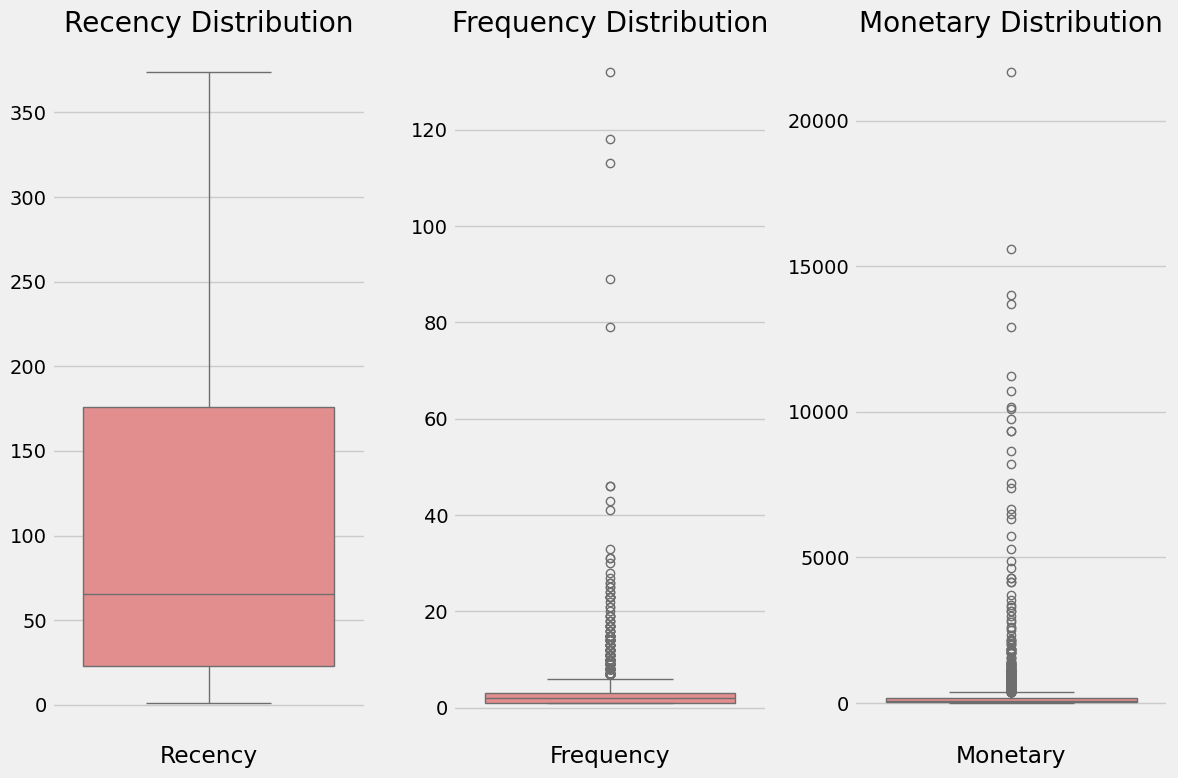

<Figure size 640x480 with 0 Axes>

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,8))

# ---------- plot 1------------------
sns.boxplot(data=rfm,y='Recency',color='lightcoral',ax=ax1)
ax1.set_title("Recency Distribution")
ax1.set_xlabel('Recency')
ax1.set_ylabel('')

# ---------- plot 2------------------
sns.boxplot(data=rfm,y='Frequency',color='lightcoral',ax=ax2)
ax2.set_title("Frequency Distribution")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('')
# ---------- plot 1------------------
sns.boxplot(data=rfm,y='Monetary',color='lightcoral',ax=ax3)
ax3.set_title("Monetary Distribution")
ax3.set_xlabel('Monetary')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()
plt.savefig('RFM Distribution of boxplot.png')

## Check Outliers

In [21]:
def check_outliers(rfm,column):
    q1 = rfm[column].quantile(0.25)
    q3 = rfm[column].quantile(0.75)

    IQR = q3-q1
    
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR

    outliers = rfm[(rfm[column] > upper_bound) | (rfm[column] < lower_bound)]
    print(f'⚠️ Number of Outliers in {column} : {len(outliers)}\n')
    print(outliers.describe())
    print('\n')

In [22]:
columns_to_check_outliers =  ['Frequency','Monetary']
for col in columns_to_check_outliers:
    check_outliers(rfm,col)

⚠️ Number of Outliers in Frequency : 318

         CustomerID     Recency   Frequency      Monetary
count    318.000000  318.000000  318.000000    318.000000
mean   15360.339623   25.220126   12.927673   1231.969748
std     1717.024860   36.444270   13.529654   2481.691582
min    12347.000000    1.000000    7.000000     43.870000
25%    13988.500000    5.000000    8.000000    244.907500
50%    15284.500000   13.000000    9.500000    419.510000
75%    16833.750000   30.000000   13.000000    892.920000
max    18283.000000  372.000000  132.000000  21681.620000


⚠️ Number of Outliers in Monetary : 325

         CustomerID     Recency   Frequency      Monetary
count    325.000000  325.000000  325.000000    325.000000
mean   15195.258462   48.375385   10.621538   1509.522246
std     1804.829783   62.776750   14.251971   2562.013829
min    12347.000000    1.000000    1.000000    372.760000
25%    13668.000000    9.000000    4.000000    474.390000
50%    15078.000000   23.000000    7.000000  

## Remove outliers

In [23]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Return only the rows that are within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [24]:
rfm_cleaned = rfm.copy()

for col in ['Frequency', 'Monetary']:
    rfm_cleaned = remove_outliers(rfm_cleaned, col)


# Visualise again with the boxplot

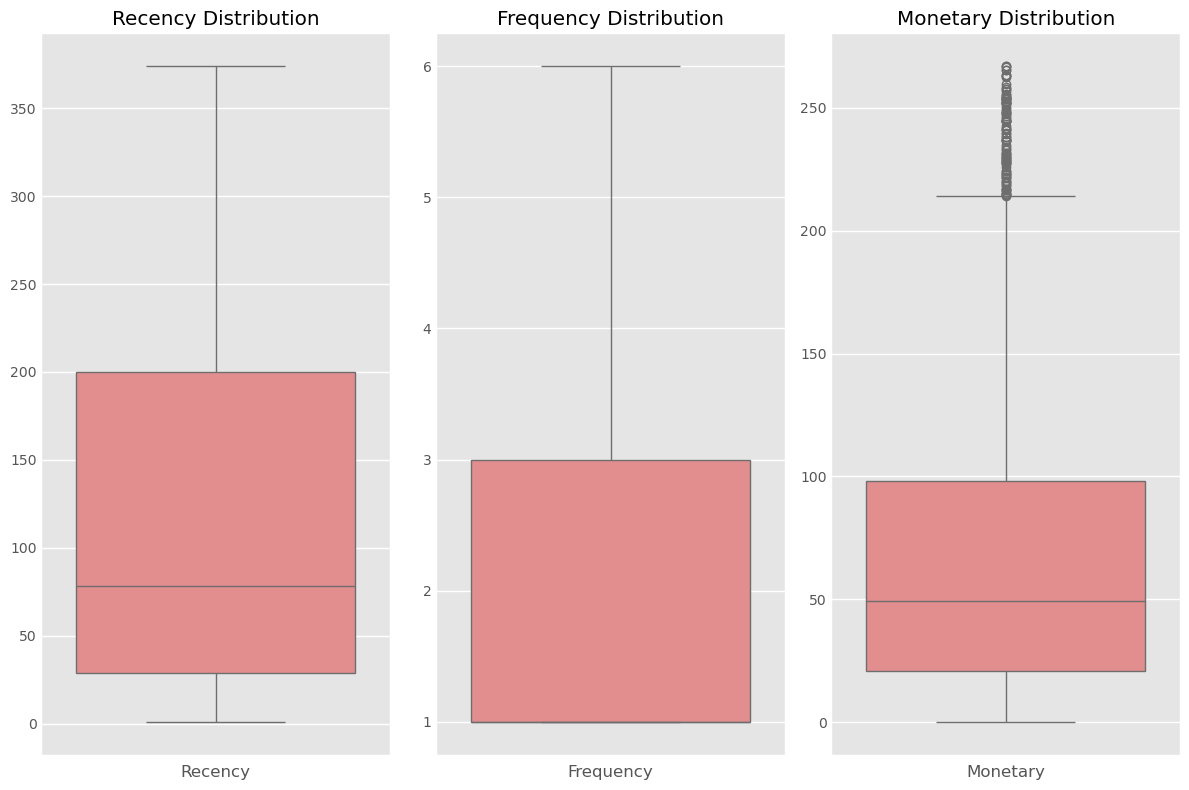

<Figure size 640x480 with 0 Axes>

In [25]:
plt.style.use('ggplot')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,8))

# ---------- plot 1------------------
sns.boxplot(data=rfm_cleaned,y='Recency',color='lightcoral',ax=ax1)
ax1.set_title("Recency Distribution")
ax1.set_xlabel('Recency')
ax1.set_ylabel('')

# ---------- plot 2------------------
sns.boxplot(data=rfm_cleaned,y='Frequency',color='lightcoral',ax=ax2)
ax2.set_title("Frequency Distribution")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('')
# ---------- plot 1------------------
sns.boxplot(data=rfm_cleaned,y='Monetary',color='lightcoral',ax=ax3)
ax3.set_title("Monetary Distribution")
ax3.set_xlabel('Monetary')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()
plt.savefig('RFM Distribution of boxplot.png')

## Apply RFM Scoring

In [26]:
# Score each RFM metric on a scale of 1–5 using quantiles.
rfm_cleaned['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm_cleaned['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_cleaned['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [27]:
# Combine RFM Score
rfm_cleaned['RFM_Score'] = rfm_cleaned['R_score'].astype(str) + rfm_cleaned['F_score'].astype(str) + rfm_cleaned['M_score'].astype(str)


## Create Customer Segments

In [28]:
def segment_customer(rfm_cleaned):
    r = int(rfm_cleaned['R_score'])
    f = int(rfm_cleaned['F_score'])
    m = int(rfm_cleaned['M_score'])

    if r == 5 and f >= 4 and m >= 4:
        return 'Champions'
    elif r == 5 and f >= 4:
        return 'Loyal Customers'
    elif r == 5:
        return 'Recent Customers'
    elif f >= 4:
        return 'Frequent Buyers'
    elif m >= 4:
        return 'Big Spenders'
    elif r <= 2 and f <= 2:
        return 'At Risk'
    elif r == 1:
        return 'Lost'
    else:
        return 'Others'

rfm_cleaned['Segment'] = rfm_cleaned.apply(segment_customer, axis=1)


In [29]:
rfm_cleaned.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
1,12349.0,19,1,85.13,4,1,3,413,Others
2,12350.0,310,1,36.40,1,1,2,112,At Risk
3,12352.0,80,1,12.50,3,1,1,311,Others
4,12354.0,232,1,16.60,1,1,1,111,At Risk
5,12355.0,214,1,96.30,1,1,4,114,Big Spenders


## Visulise the Segments through countplot

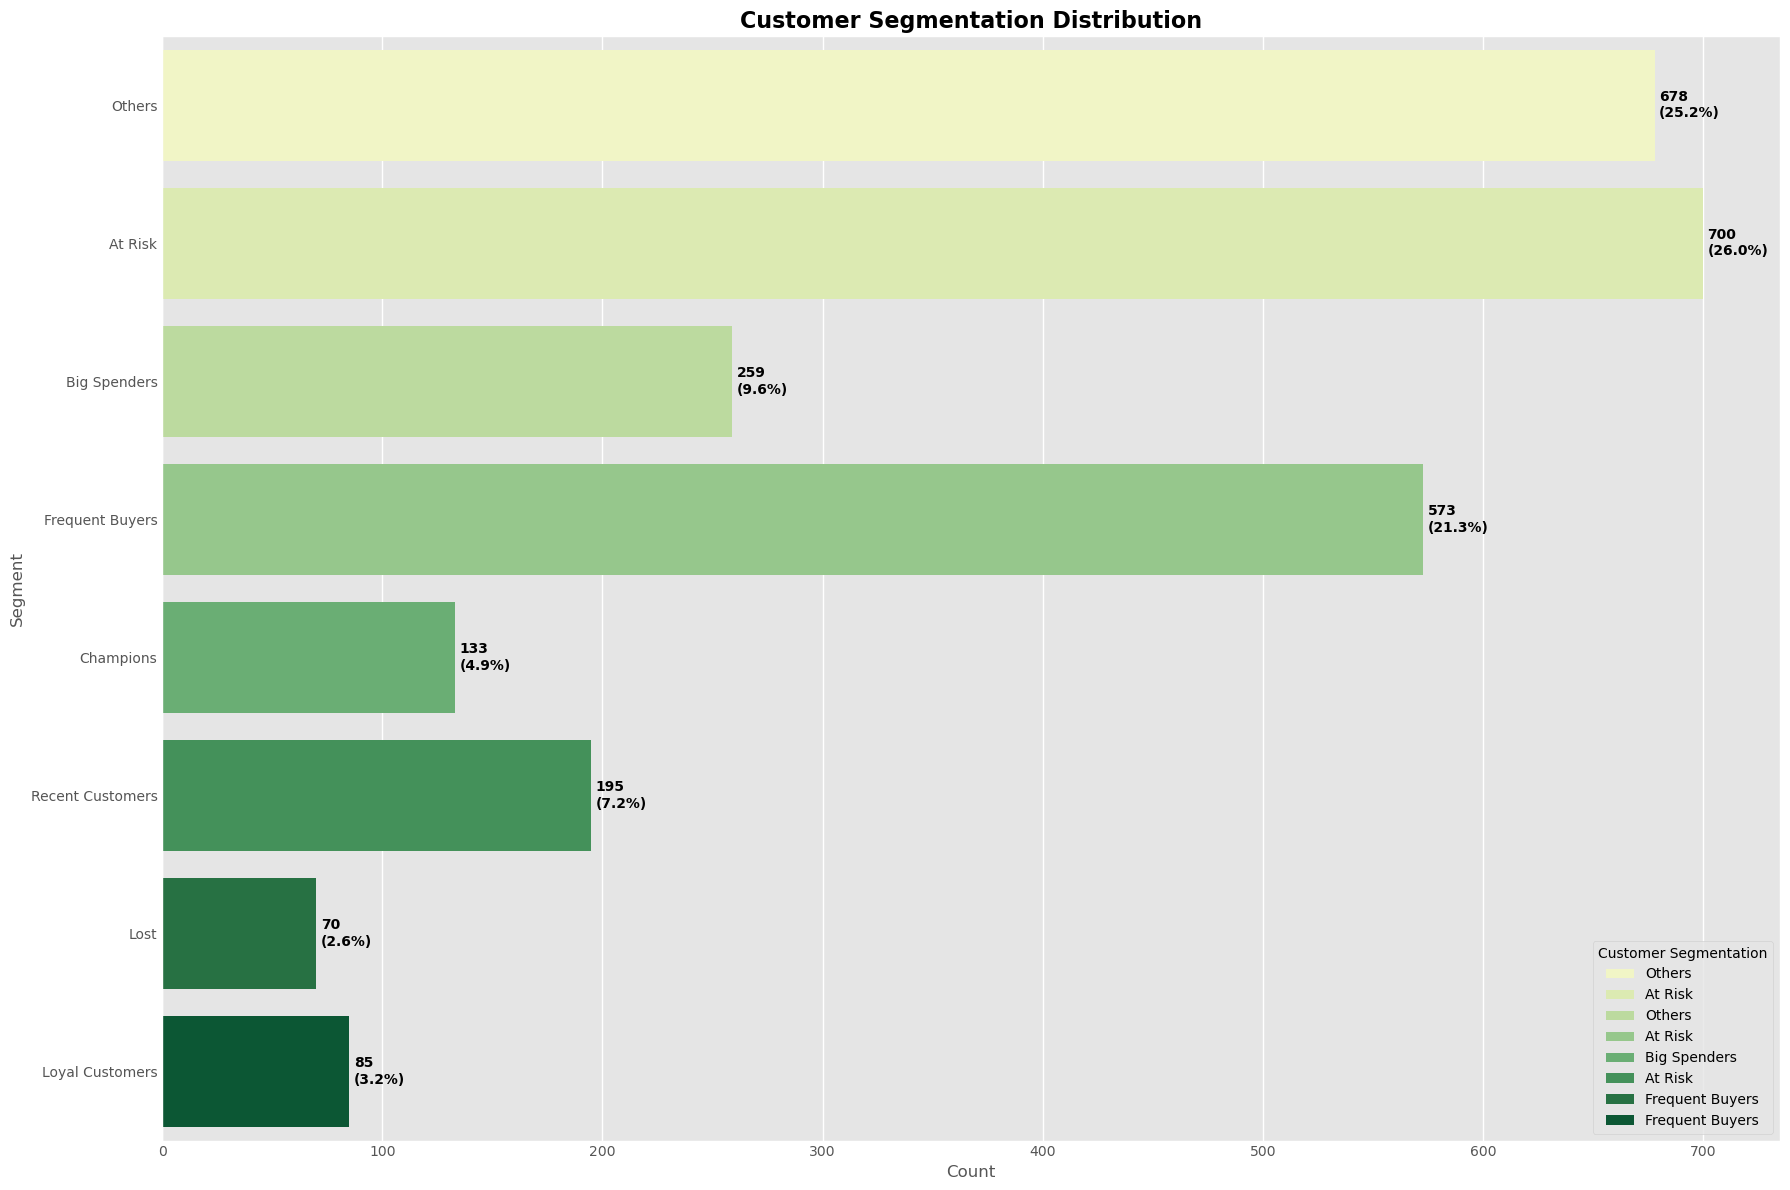

<Figure size 640x480 with 0 Axes>

In [30]:
# Create figure
fig, ax = plt.subplots(figsize=(18, 12))

# Countplot
sns.countplot(data=rfm_cleaned, y='Segment', palette='YlGn', ax=ax)
ax.set_title('Customer Segmentation Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Segment')
ax.legend(title='Customer Segmentation', labels=rfm_cleaned['Segment'],loc='lower right')
# Add value labels (count + %)
total = len(rfm_cleaned)
for bar in ax.patches:
    width = bar.get_width()
    percent = (width / total) * 100
    x = width + 2  # little padding
    y = bar.get_y() + bar.get_height() / 2
    ax.text(x, y, f'{int(width)}\n({percent:.1f}%)',
            ha='left', va='center', fontsize=10, fontweight='bold')

# Tidy layout
plt.tight_layout()
plt.show()
plt.savefig('Customer Segmentation Distribution.png')

## 📊 Key Insights from RFM Customer Segmentation

The chart above visualizes how customers are distributed across key RFM-based segments. Below is the breakdown of customer counts:

| Segment            | Customer Count |
|--------------------|----------------|
| Frequent Buyers    | 573            |
| At Risk            | 700            |
| Others             | 678            |
| Champions          | 133            |
| Big Spenders       | 259            |
| Recent Customers   | 195            |
| Lost               | 70             |
| Loyal Customers    | 85             |

---

### 🔍 Key Insights:

1. **🛍️ Frequent Buyers (573)**  
   - Largest group of regular customers.  
   - 👉 _Introduce loyalty programs, send personalized offers to increase lifetime value._

2. **⚠️ At Risk (700)**  
   - Most concerning group — used to be active but are now inactive.  
   - 👉 _Run win-back campaigns or limited-time offers to re-engage._

3. **❓ Others (678)**  
   - Unclassified or mixed behavior group.  
   - 👉 _Dig deeper to uncover hidden segments or personalize communication._

4. **👑 Champions (133)**  
   - Most valuable customers (recent, frequent, high-spending).  
   - 👉 _Offer VIP rewards, early access to products, request testimonials or referrals._

5. **💸 Big Spenders (259)**  
   - High monetary value, but may lack frequency.  
   - 👉 _Engage with personalized messages to drive more frequent purchases._

6. **🆕 Recent Customers (195)**  
   - Newly acquired customers.  
   - 👉 _Send welcome emails, guides, and second-purchase incentives._

7. **🧊 Lost (70)**  
   - Very low recent activity.  
   - 👉 _Try reactivation offers or gather feedback through exit surveys._

8. **💚 Loyal Customers (85)**  
   - Consistently engaged over time.  
   - 👉 _Reward loyalty with thank-you messages, special recognition, or referral bonuses._

---

### ✅ Summary Action Plan:

| Segment         | Action Plan |
|----------------|-------------|
| **Frequent Buyers** | Loyalty rewards and engagement campaigns |
| **At Risk**          | Urgent win-back campaigns |
| **Others**           | Investigate and analyze behavior further |
| **Champions**        | VIP treatment and referral requests |
| **Big Spenders**     | Push for more frequent engagement |
| **Recent**           | Onboarding and educational content |
| **Lost**             | Reactivation or feedback gathering |
| **Loyal**            | Recognition and retention focus |

---


##  Find Customers in Each Segment

In [31]:
# Get unique segment names
segments = rfm_cleaned['Segment'].unique()

# Loop through each segment and print the customers
for segment in segments:
    print(f"\n📌 Segment: {segment}")
    segment_customers = rfm_cleaned[rfm_cleaned['Segment'] == segment]
    
    print(f"Total Customers: {len(segment_customers)}")
    print(segment_customers[['CustomerID', 'Recency', 'Frequency', 'Monetary']].head())  # Show first 5 for preview



📌 Segment: Others
Total Customers: 678
    CustomerID  Recency  Frequency  Monetary
1      12349.0       19          1     85.13
3      12352.0       80          1     12.50
18     12374.0       25          1     33.90
22     12379.0       82          2     37.40
26     12384.0       29          2     53.65

📌 Segment: At Risk
Total Customers: 700
    CustomerID  Recency  Frequency  Monetary
2      12350.0      310          1     36.40
4      12354.0      232          1     16.60
6      12356.0      326          1     80.80
13     12365.0      291          1     36.75
16     12372.0      213          1     31.50

📌 Segment: Big Spenders
Total Customers: 259
    CustomerID  Recency  Frequency  Monetary
5      12355.0      214          1     96.30
15     12371.0       60          1    258.40
21     12378.0      130          1    214.30
25     12383.0      238          2    130.20
38     12405.0      149          1    196.98

📌 Segment: Frequent Buyers
Total Customers: 573
    CustomerID

## Scale th RFM values

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Scale the RFM values
rfm_scaled = rfm_cleaned[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)

## Training Clusters Model on Dataset

In [34]:
from sklearn.cluster import KMeans

In [35]:
## Function to find the optimal number of cluster with elbowmethod
def elbowOptimizer(data):
    wcss = [] # withing cluster sum of cells
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k,random_state=42,init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_) # WCSS score It tells us how tightly grouped the data is within each cluster
    plt.plot(range(1,11), wcss,'bo-')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()
    plt.savefig('Elbow Method.png')

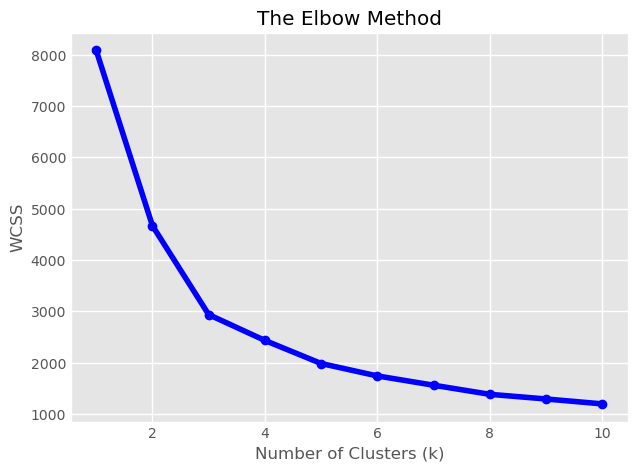

<Figure size 640x480 with 0 Axes>

In [36]:
elbowOptimizer(rfm_scaled)

### 🔍 Elbow Method Analysis:

Based on the elbow plot:

- WCSS drops significantly from **k = 1 to k = 3**.
- After **k = 3**, the WCSS reduction slows down, indicating diminishing returns.
- This suggests that **k = 3** is the optimal number of clusters.

### ✅ Conclusion:
**k = 3** is the best choice for KMeans clustering as per the elbow method.


In [37]:
import scipy.cluster.hierarchy as sch

# function to find the optimal number of cluster using Dendograms
def dendoOptimizer(data):
    sch.dendrogram(sch.linkage(data,method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()
    plt.savefig('Dendrogram.png')

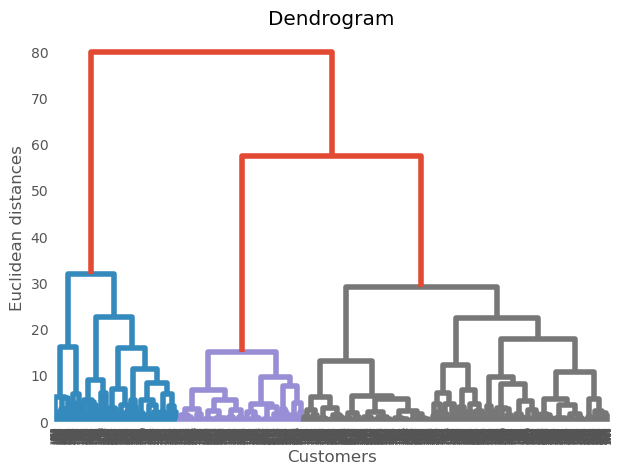

<Figure size 640x480 with 0 Axes>

In [38]:
dendoOptimizer(rfm_scaled)

### 🔍 Dendrogram Analysis:

- The dendrogram shows a **large vertical gap** between some cluster merges.
- Drawing a horizontal line across this largest gap intersects **3 clusters** before the next big merge.
- This suggests the optimal number of clusters is:

### ✅ Conclusion:
**3 clusters** is the best choice according to the dendrogram method (Hierarchical Clustering).


## Apply KMeans with ```k=3```

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_cleaned['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [40]:
## Analyze the KMeans Cluster
rfm_cleaned.groupby('KMeans_Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'
}).rename(columns={'CustomerID':'Count',
                  'Recency': 'Average Recency',
                  'Frequency': 'Average Frequency',
                  'Monetary': 'Average Monetary',}).round(1)


,Average Recency,Average Frequency,Average Monetary,Count
KMeans_Cluster,,,,
0,266.7,1.2,46.2,791
1,60.7,1.5,42.6,1257
2,59.3,3.7,149.8,645


#### 🧠 Observation:

| Cluster | Avg Recency | Avg Frequency | Avg Monetary | Interpretation              | Label             |
|---------|-------------|----------------|---------------|------------------------------|-------------------|
| 0       | 266.7       | 1.2            | 46.2          | Very inactive, low value     | Dormant           |
| 1       | 60.7        | 1.5            | 42.6          | Recent but low spenders      | Light Shoppers    |
| 2       | 59.3        | 3.7            | 149.8         | Frequent and high spenders   | Premium Engaged   |

#### ✅ Final KMeans Cluster Labels:
- **Cluster 0** → **Dormant**
- **Cluster 1** → **Light Shoppers**
- **Cluster 2** → **Premium Engaged**


In [64]:
# Compare RFM Segments with KMeans Segments
tb = pd.crosstab(rfm_cleaned['Segment'], rfm_cleaned['KMeans_Cluster']).rename(columns=
                                                               {0:'Dorment(0)',
                                                               1:'Light Shoppers(1)',
                                                               2:'Premium Engaged(2)'})

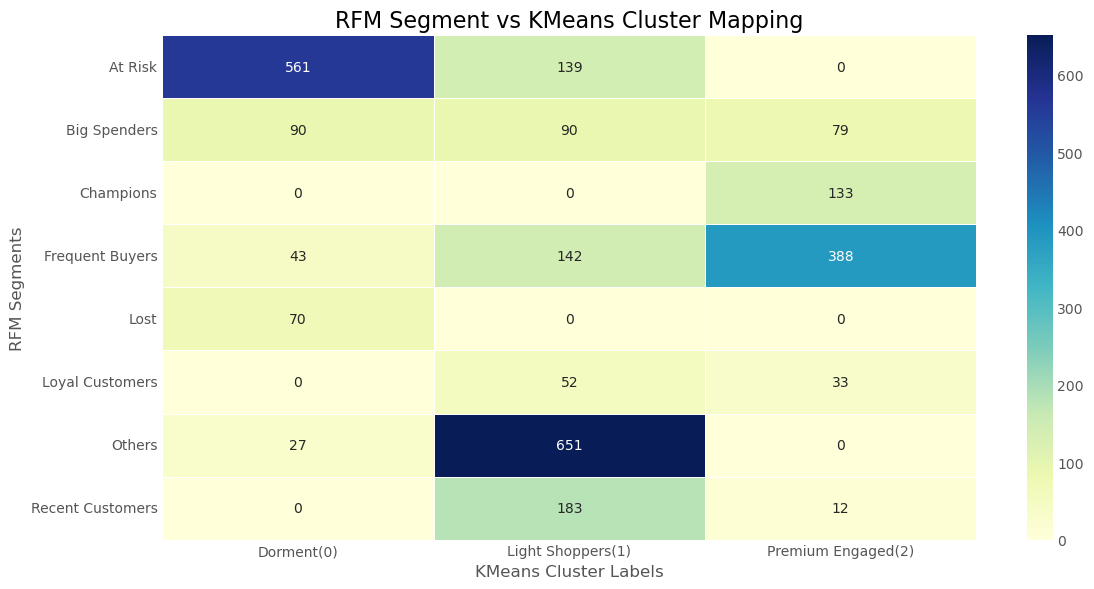

In [67]:
# Set up the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tb, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)

plt.title('RFM Segment vs KMeans Cluster Mapping', fontsize=16)
plt.xlabel('KMeans Cluster Labels')
plt.ylabel('RFM Segments')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 🧾 Observations:

1. **Champions** are strongly grouped in **Cluster 2 (Premium Engaged)** – this indicates high accuracy of clustering for top customers.
2. **Frequent Buyers** are mostly present in **Cluster 2**, showing they are very active and valuable.
3. **At Risk** and **Lost** customers are concentrated in **Cluster 0 (Dormant)**, which captures disengaged or inactive users.
4. **Recent Customers** and **Others** are heavily present in **Cluster 1 (Light Shoppers)** – suggesting they are either new or low-frequency shoppers.
5. **Big Spenders** are spread across all clusters, indicating mixed behavior — some have gone dormant while others remain engaged.

#### ✅ Cluster Meaning Summary:

| KMeans Cluster | Label           | Characteristics                                  | Strategy           |
| -------------- | --------------- | ------------------------------------------------ | ------------------ |
| **0**          | Dormant         | Inactive, high Recency, low Frequency & Monetary | Win-back or prune  |
| **1**          | Light Shoppers  | Occasional buyers, moderate recency              | Nurture and upsell |
| **2**          | Premium Engaged | Frequent, high-spending, recent buyers           | Retain and reward  |

---



## 3D Scatter plot with ```KMeans = 3```

In [44]:
from mpl_toolkits.mplot3d import Axes3D

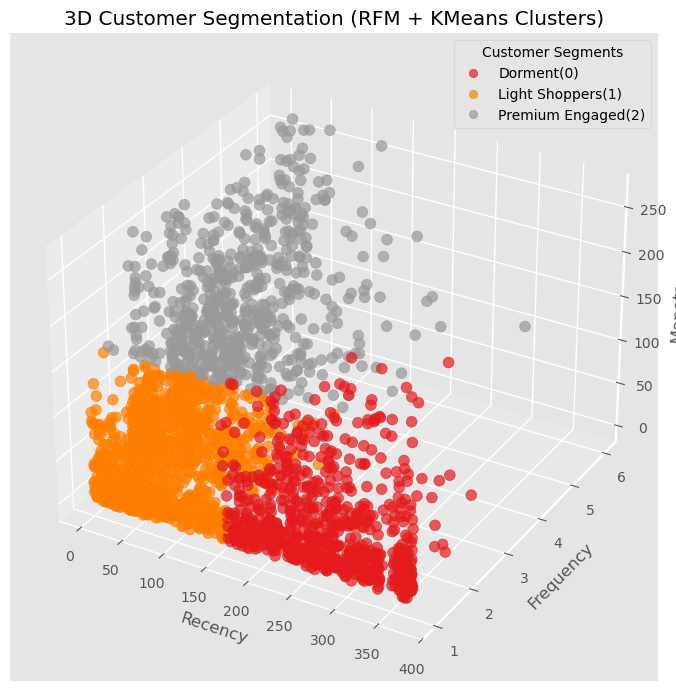

<Figure size 640x480 with 0 Axes>

In [56]:
#  Create a 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters in 3D
scatter = ax.scatter(
    rfm_cleaned['Recency'],
    rfm_cleaned['Frequency'],
    rfm_cleaned['Monetary'],
    c=rfm_cleaned['KMeans_Cluster'],
    cmap='Set1',
    s=60,
    alpha=0.7
)

# Label axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation (RFM + KMeans Clusters)')

# Create custom legend
handles, _ = scatter.legend_elements(prop="colors")
cluster_labels = rfm_cleaned['Cluster_Label'].unique()
legend_labels = [label_map[i] for i in sorted(label_map.keys())]
ax.legend(handles, legend_labels, title="Customer Segments", loc='best')

plt.show()
plt.savefig('3D Customer Segmentation.png')


## 1. Understanding RFM Dimensions:

* **Recency (X-axis):** Days since the last purchase. Lower values indicate more recent activity.
* **Frequency (Y-axis):** Total number of purchases. Higher values indicate more frequent engagement.
* **Monetary (Z-axis):** Total amount spent. Higher values indicate higher customer value.

## 2. K-Means Customer Segments:

The K-Means algorithm identified three distinct customer segments, visually represented by different colors in the 3D scatter plot:

---

### **Segment 0: Dormant (Red Points)**

* **Characteristics:** These customers are characterized by **high Recency** (haven't purchased in a long time, e.g., 200-400+ days), **low Frequency** (infrequent buyers, e.g., 1-3 purchases), and **low Monetary value** (low overall spending, e.g., 0-50). They represent inactive or lapsed customers.
* **Key Insight:** This group shows a significant decline in engagement and value.
* **Actionable Strategies:**
    * **Re-engagement Campaigns:** Implement win-back campaigns with significant incentives to encourage a return.
    * **Churn Analysis:** Investigate reasons for their inactivity to prevent future churn.
    * **Resource Allocation:** Carefully consider the ROI of re-engagement efforts, as they may be low-priority.

---

### **Segment 1: Light Shoppers (Orange Points)**

* **Characteristics:** This segment exhibits **moderate Recency** (somewhat recent purchases, e.g., 0-200 days), **low to moderate Frequency** (sporadic buyers, e.g., 1-4 purchases), and **low to moderate Monetary value** (e.g., 0-100). This group likely includes new customers or occasional buyers.
* **Key Insight:** These customers show potential for increased engagement but require nurturing.
* **Actionable Strategies:**
    * **Nurturing Programs:** Focus on onboarding for new customers, educating them about product benefits.
    * **Incentivize Repeat Purchases:** Offer targeted promotions or personalized recommendations for a second or third purchase.
    * **Upselling/Cross-selling:** Introduce complementary products or services to increase their spending.

---

### **Segment 2: Premium Engaged (Grey Points)**

* **Characteristics:** This is our most valuable segment, defined by **low Recency** (very recent purchases, e.g., 0-150 days), **high Frequency** (frequent buyers, e.g., 4-8+ purchases), and **high Monetary value** (significant spenders, e.g., 100-250+). They are your most loyal and profitable customers.
* **Key Insight:** These customers are highly engaged and are the core contributors to revenue.
* **Actionable Strategies:**
    * **Retention & Loyalty:** Implement VIP programs, exclusive offers, and early access to new products.
    * **Customer Advocacy:** Encourage referrals and testimonials, leveraging their satisfaction.
    * **Personalized Experience:** Continue to provide exceptional service and tailored communications to maintain their high engagement.
    * **Avoid Over-Discounting:** Focus on value-added services and experiences rather than heavy discounts.

---

## 3. Overall Observations & Next Steps:

The 3D plot effectively visualizes the distinct behavioral patterns of each segment. The clear separation achieved by K-Means allows for immediate strategic planning. By understanding the unique needs and behaviors of each group, we can tailor marketing campaigns, customer service efforts, and product development to maximize customer lifetime value and business growth.